# <center> 决策树

In [3]:
import sklearn
import pandas as pd


In [6]:
df = pd.read_excel("猫狗识别training_set.xlsx")

In [7]:
df

,耳朵形状,脸型,是否有胡须,是否是猫
0,1,1,1,1
1,0,0,1,1
2,0,1,0,0
3,1,0,1,0
4,1,1,1,1
5,1,1,0,1
6,0,0,0,0
7,1,1,0,1
8,0,1,0,0
9,0,1,0,0


# 拆分训练集
分成“特征集”和“答案集”
* “特征集”：耳朵形状，脸型，是否有胡须
* “答案集”: 是否是猫

In [8]:
feature=df.drop(['是否是猫'],axis=1)

In [9]:
feature

,耳朵形状,脸型,是否有胡须
0,1,1,1
1,0,0,1
2,0,1,0
3,1,0,1
4,1,1,1
5,1,1,0
6,0,0,0
7,1,1,0
8,0,1,0
9,0,1,0


In [10]:
target=pd.DataFrame({"是否是猫":df['是否是猫']})

In [11]:
target

,是否是猫
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,0
9,0


# 导入模型

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtc=DecisionTreeClassifier()
dtc.fit(feature,target)


DecisionTreeClassifier()

# 画出决策树

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import matplotlib.font_manager as fm

font_path = 'path/to/your/Chinese/font.ttf'  
prop = fm.FontProperties(fname=font_path)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.5, 'x[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

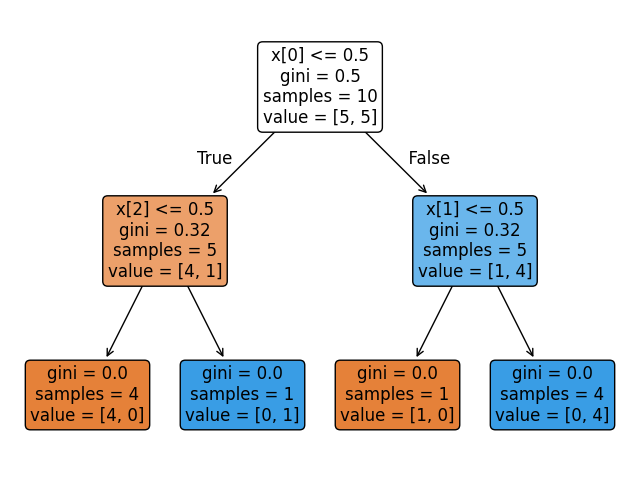

In [15]:
plt.figure(figsize=(8,6))

plot_tree(dtc,fontsize=12,rounded=True,filled=True)

In [16]:
help(plot_tree)

Help on function plot_tree in module sklearn.tree._export:

plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)
    Plot a decision tree.
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    The visualization is fit automatically to the size of the axis.
    Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
    the size of the rendering.
    
    Read more in the :ref:`User Guide <tree>`.
    
    .. versionadded:: 0.21
    
    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be plotted.
    
    max_depth : int, default=None
        The maximum depth of the representation. If None, the tree is fully
        generated.
    
    feature_names : array-like of str, default=None
        Na

In [18]:
target.keys()

Index(['是否是猫'], dtype='object')

# 评估模型

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(dtc.predict(feature),target)

array([[5, 0],
       [0, 5]], dtype=int64)

In [21]:
dtc.predict(feature)

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [22]:
df_test=pd.read_excel("猫狗识别test_set.xlsx")

In [23]:
df_test

,耳朵形状,脸型,是否有胡须,是否是猫
0,0,0,0,0
1,1,1,0,1
2,1,1,1,1
3,0,0,0,0
4,1,1,0,0


In [24]:
test_feature=df_test.drop(['是否是猫'],axis=1)

In [25]:
test_target=df_test['是否是猫']

In [26]:
confusion_matrix(dtc.predict(test_feature),test_target)

array([[2, 0],
       [1, 2]], dtype=int64)

In [27]:
dtc.predict(test_feature)

array([0, 1, 1, 0, 1], dtype=int64)